This documention is made from a jupyter notebook available in 'Exemple/Documentation.ipynb'

# Load the data

In [1]:
import DICToolbox.dic as dic
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from IPython.display import Image

In [2]:
# Folder where output from 7D are
adr='Data/7D-output/'
# Resolution of the pixel. Information extracted from image used for the DIC
res=0.0513 # mm/pixel You can chose the unity you want
# time step between each picture
time_step=150*60 # second here but you can choose the unity you want
# microstructure picture
# It sould be a black and white (boundary) image where the resolution is depending of the size of the correlation windows used in 7D.
# Here n=p=10 in 7D
micro='Data/micro_10.bmp'

# Create Data object
data=dic.dic(adr,res,time_step,adr_micro=micro)

## Structure of the object
### How many time step ?
You can fin this information running this :

In [3]:
print('Numbers of time step = '+str(len(data.strain)))

Numbers of time step = 9


### What are the data stored ?
**Displacement field** : (u,v) for $u\vec{x}+v\vec{y}$

**Strain Tensor** : strain

$\mathbf{\omega_{xy}}$ : oxy

**microstructure** : micro

**grains label** : grains

**time** : time

# Plot the data

For the time step 5

In [4]:
t=5

## Displacement

Text(0.5, 1.0, 'Vertical displacement : v')

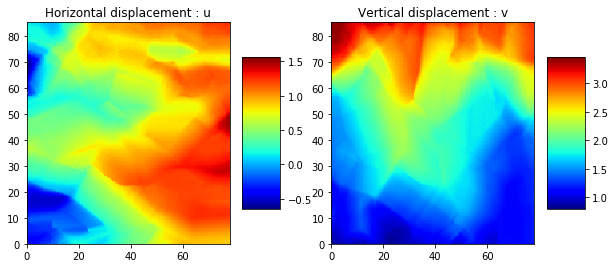

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.u[t].plot()
plt.title('Horizontal displacement : u')
plt.subplot(1,2,2)
data.v[t].plot()
plt.title('Vertical displacement : v')

## Componante of strain tensor

/home/chauvet/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.5, 1.0, '$\\epsilon_{xy}$')

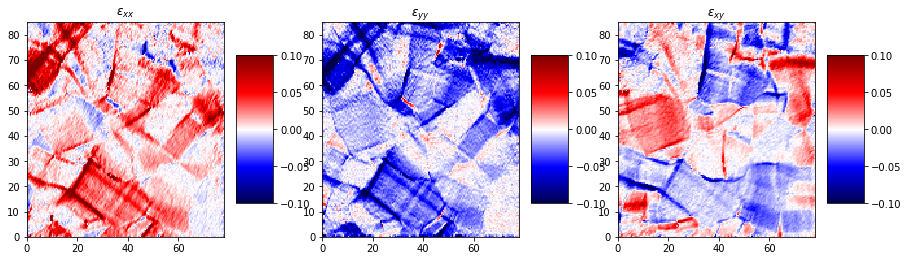

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
data.strain[t].t11.plot(colorbarcenter=True,colorbar=cm.seismic)
plt.title('$\epsilon_{xx}$')
plt.subplot(1,3,2)
data.strain[t].t22.plot(colorbarcenter=True,colorbar=cm.seismic)
plt.title('$\epsilon_{yy}$')
plt.subplot(1,3,3)
data.strain[t].t12.plot(colorbarcenter=True,colorbar=cm.seismic)
plt.title('$\epsilon_{xy}$')


## Solid rotation

Text(0.5, 1.0, '$\\omega_{xy}$')

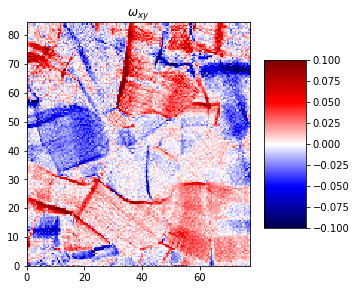

In [7]:
plt.figure(figsize=(5,5))
data.oxy[t].plot(colorbarcenter=True,colorbar=cm.seismic)
plt.title('$\omega_{xy}$')

## Equivalent strain
VonMises equivalent strain field :
$\sqrt{\frac{2}{3}\left( \varepsilon_{xx}^2+\varepsilon_{yy}^2+2.\varepsilon_{xy}^2 \right) }$

Text(0.5, 1.0, 'Equivalent strain VonMises')

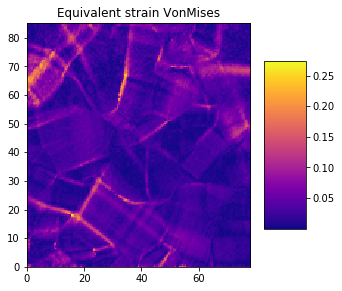

In [8]:
plt.figure(figsize=(5,5))
data.strain[t].eqVonMises().plot(colorbar=cm.plasma)
plt.title('Equivalent strain VonMises')

In [9]:
## Add microstructure on figure

Text(0.5, 1.0, 'Equivalent strain VonMises + Grains boundries')

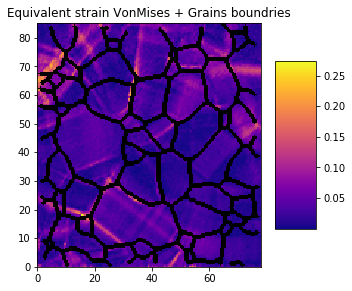

In [10]:
plt.figure(figsize=(5,5))
data.strain[t].eqVonMises().plot(colorbar=cm.plasma)
data.micro.plotBoundary(dilatation=1)
plt.title('Equivalent strain VonMises + Grains boundries')

## Plot principal direction of the strain tensor

(0.0, 77.976, 0.0, 85.158)

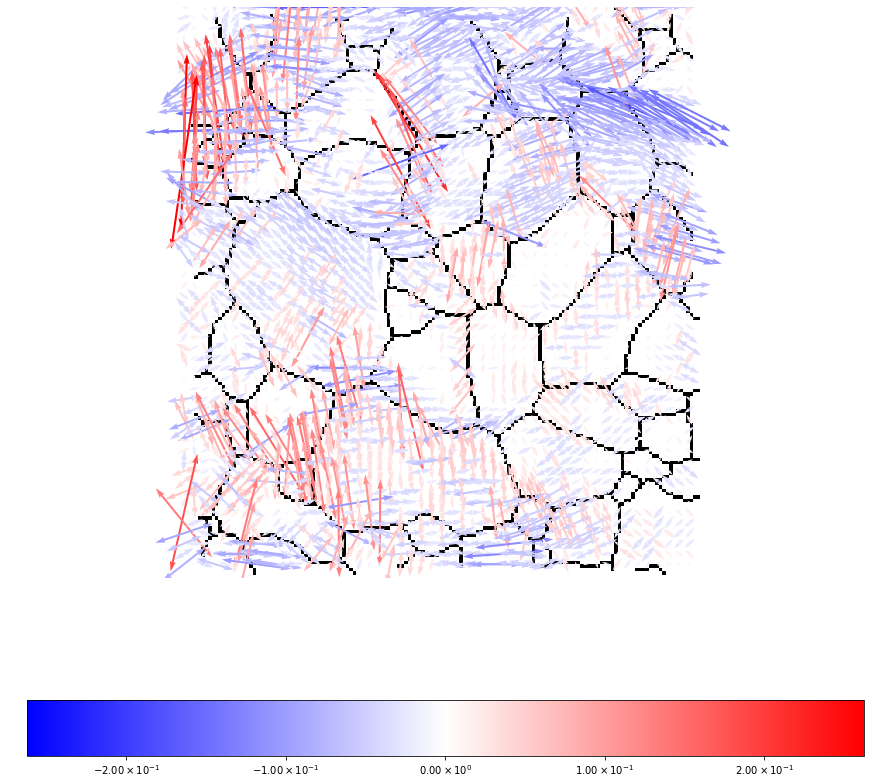

In [11]:
plt.figure(figsize=(15,15))
data.strain[t].principal_tensor(scale=50,space=3,twod=True,absolutemax=True)
data.micro.plotBoundary()
plt.axis('off')

## Autocorrelation function
It shows how to do autocorrelation onequivalent strain VonMises

In [12]:
[res_auto,Cinf,profil,xi,cross]=data.strain[t].eqVonMises().auto_correlation(pad=2)

### Autocorrelation function

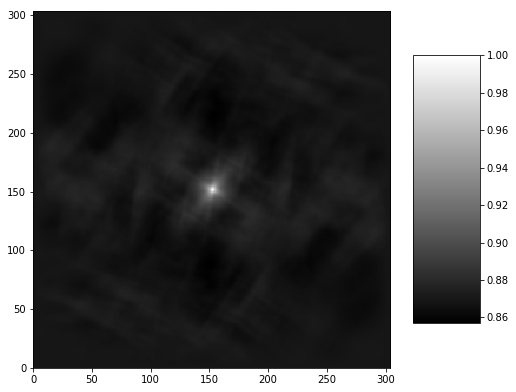

In [13]:
plt.figure(figsize=(8,8))
res_auto.plot(colorbar=cm.binary_r)

### Autocorrelation radius vs angle of profil
Orientation of the angle value used below

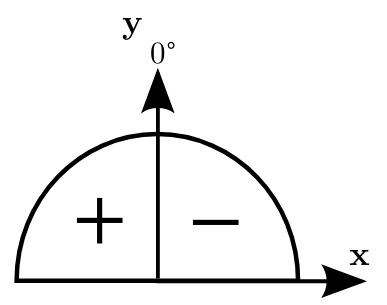

In [14]:
Image('autocor.png', width=200)

It shows the Autocorrelation radius function of the direction

Text(0, 0.5, 'Correlation length (mm)')

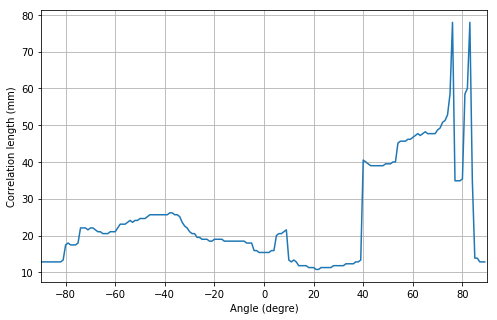

In [15]:
angle=np.linspace(-90,89,180)

plt.figure(figsize=(8,5))
plt.plot(angle,cross)
plt.grid()
plt.xlim([-90,90])
plt.xlabel('Angle (degre)')
plt.ylabel('Correlation length (mm)')

You can extract the maximum and the minimum radius and the orientation associated

In [16]:
idmax=np.where(cross==np.max(cross))
anmax=angle[idmax[0][0]]
idmin=np.where(cross==np.min(cross))
anmin=angle[idmin[0][0]]
print('Maximum : Correlation length = '+str(np.max(cross))+'mm, Angle = '+str(anmax))
print('Minimum : Correlation length = '+str(np.min(cross))+'mm, Angle = '+str(anmin))

Maximum : Correlation length = 77.976mm, Angle = 76.0
Minimum : Correlation length = 10.773mm, Angle = 21.0


### Autocorrelation profil
You can plot the Autocorrelation profil for each angle. Here we show for the minimum correlation length and the maximum correlation length. We add also the Cinf value

Text(0, 0.5, 'Correlation value')

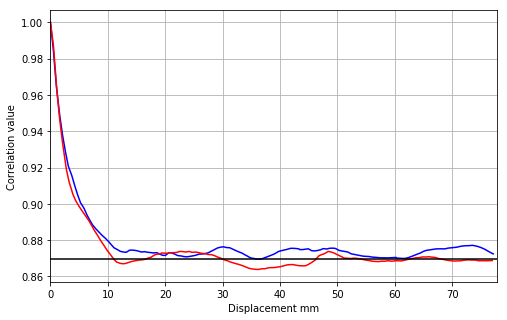

In [17]:
plt.figure(figsize=(8,5))
plt.plot(xi[idmax[0][0],:],profil[idmax[0][0],:],'b',label='Max radius')
plt.plot(xi[idmin[0][0],:],profil[idmin[0][0],:],'r',label='Min radius')
plt.plot([0,np.max(xi)],[Cinf,Cinf],'k',label='Cinf')
plt.grid()
plt.xlim([0,np.max(xi)])
plt.xlabel('Displacement mm')
plt.ylabel('Correlation value')

# Extract macroscopic curve

In [18]:
time,macro_eyy,macro_line=data.strain_macro(nb_line=3)

Text(0, 0.5, 'Macro strain')

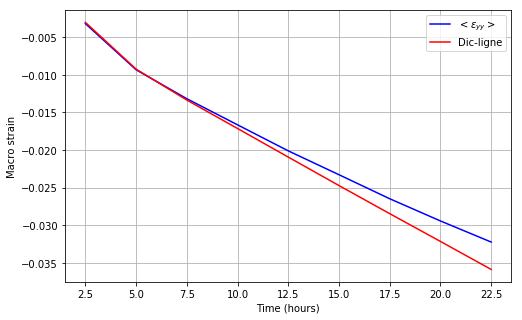

In [20]:
plt.figure(figsize=(8,5))
plt.plot(time/3600.,macro_eyy,'b',label='$<\epsilon_{yy}>$')
plt.plot(time/3600.,macro_line,'r',label='Dic-ligne')
plt.grid()
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Macro strain')